In [1]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize']=[16,9]
plt.style.use('ggplot')

from sklearn import metrics

C:\Users\rames\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\rames\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
# Importing dataset

xclara_df= pd.read_csv('xclara.csv')

print("the shape of the data:", xclara_df.shape)

xclara_df.head()

the shape of the data: (3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


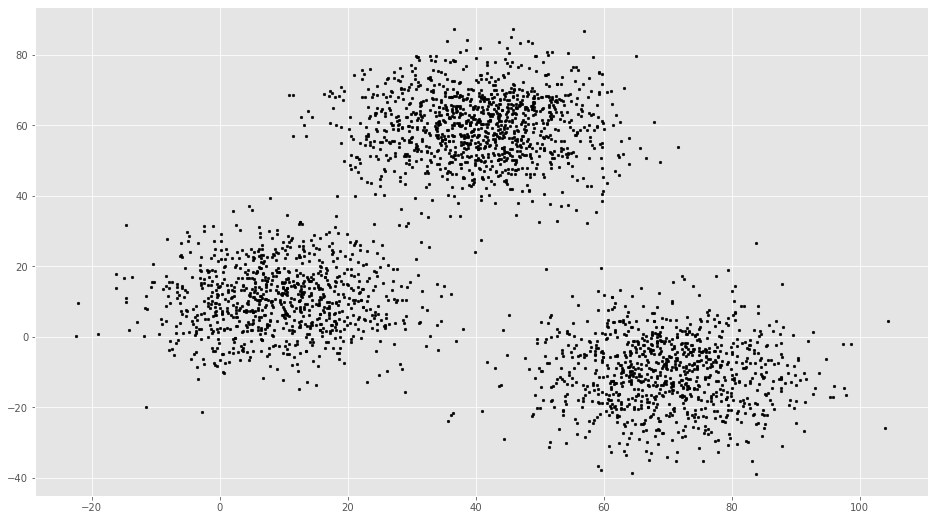

In [10]:
f1= data['V1'].values

f2= data['V2'].values



plt.scatter(f1, f2, c='black', s=7)

In [25]:

X= np.array(list(zip(f1,f2)))
from sklearn.cluster import KMeans

#let us check the optimal number if clusters

cluster_range = range(1,10)
cluster_error = []
cluster_sil_scores=[]
for num_cluster in cluster_range:
    clusters=KMeans(num_cluster, n_init=5)
    clusters.fit(X)
    labels = clusters.labels_
    centroids= clusters.cluster_centers_
    cluster_error.append(clusters.inertia_)
        
clusters_df= pd.DataFrame({"num_clusters": cluster_range, "cluster_errors":cluster_error})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,5.030433e+06
1,2,2.309985e+06
2,3,6.116059e+05
3,4,5.362711e+05
4,5,4.700646e+05
5,6,4.081411e+05
6,7,3.590888e+05
7,8,3.180851e+05
8,9,2.729965e+05


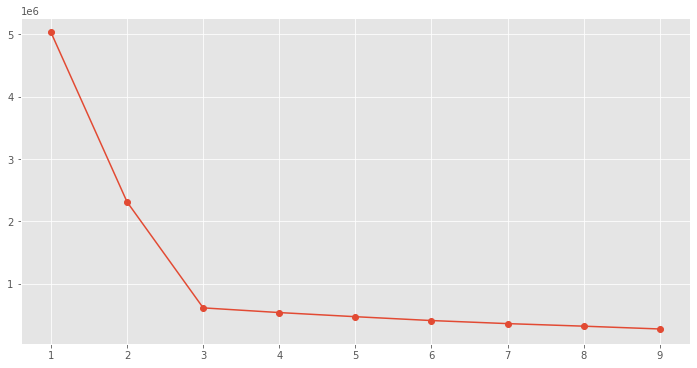

In [32]:
#Elbow plot

plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker='o')



In [48]:
#number if clusters

kmeans = KMeans(n_clusters=6)

# Fitting the input data

kmeans = kmeans.fit(X)

# Getting the cluster label

labels = kmeans.predict (X)

#Centroid Values

centroids = kmeans.cluster_centers_

#Compare with scikit-learn centroids

print (centroids)



[[ 75.60444596 -16.71079176]
 [ 31.65055107  60.29258895]
 [  1.555897     7.35029608]
 [ 64.72394509  -4.08548927]
 [ 48.00518413  59.34113467]
 [ 16.85880981  13.82971573]]


In [49]:
colnames = ['col1', 'col2']
pridiction = kmeans.predict(X)

X_df = pd.DataFrame(X, columns=colnames)
X_df['group']= pridiction
X_df

,col1,col2,group
0,2.072345,-3.241693,2
1,17.936710,15.784810,5
2,1.083576,7.319176,2
3,11.120670,14.406780,5
4,23.711550,2.557729,5
...,...,...,...
2995,85.652800,-6.461061,0
2996,82.770880,-2.373299,0
2997,64.465320,-10.501360,3
2998,90.722820,-12.255840,0


In [50]:
for i in cluster_range:
    points= np.array(X_df.loc[X_df['group']==i])
    
points

array([], shape=(0, 3), dtype=float64)

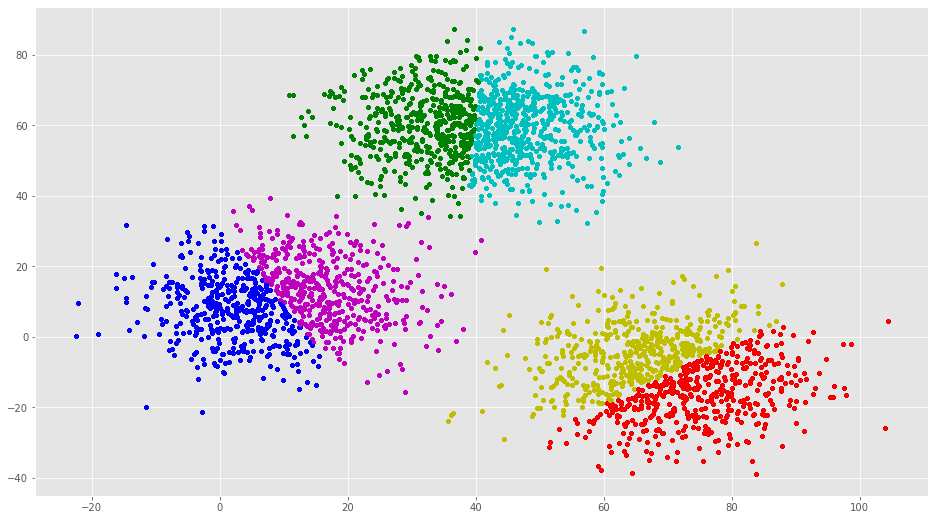

In [51]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']

fig, ax = plt.subplots()

c= np.array([3,3])


for i in labels:
    
    points = np.array(X_df.loc[X_df['group']==i])
    ax.scatter(points[:,0], points[:,1], s=7, c=colors[i])
    